In [9]:
#Importing packages
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#Loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

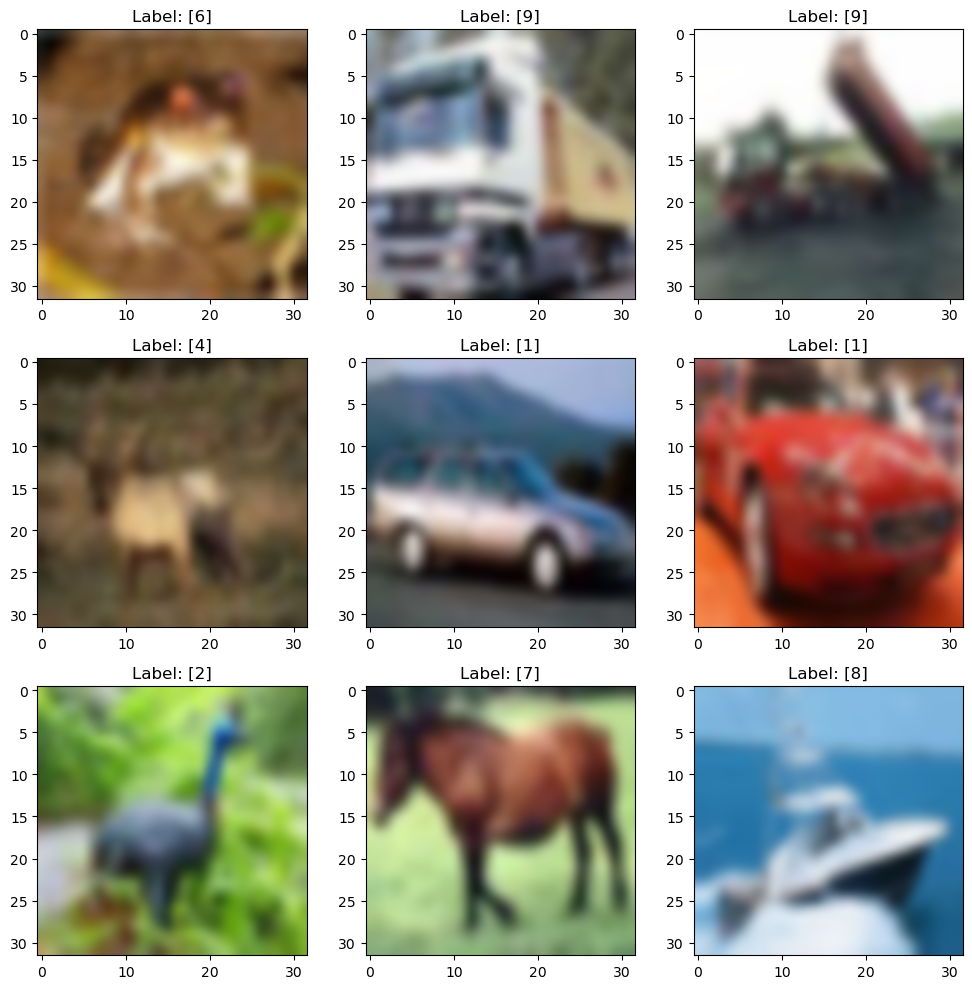

In [3]:
#Printing a few samples from the data

#Number of images to be displayed
num_images = 9

#Plotting the grid
num_rows = 3
num_cols = 3

plt.figure(figsize=(10,10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='bicubic') #Interpolation has been used since the images look pretty pixelated if printed without it.
    plt.title(f"Label: {y_train[i]}")
    plt.axis('on')

plt.tight_layout()
plt.show()

In [4]:
#Preprocessing the dataset

#Normalizing the images to the range [0,1]
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

#One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


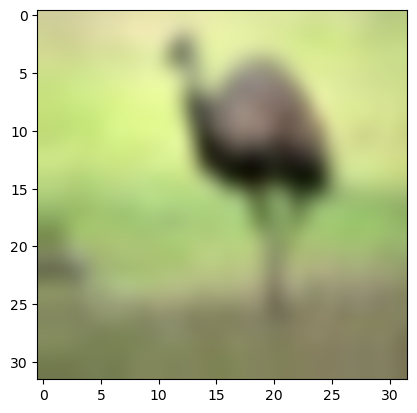

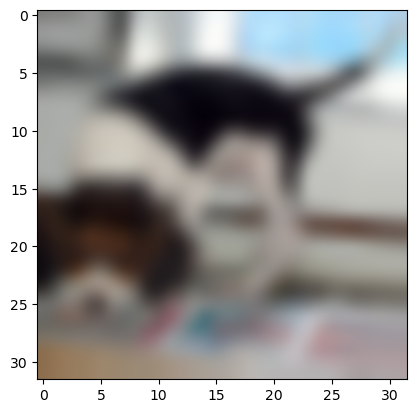

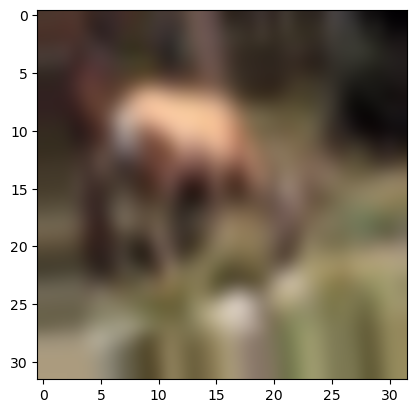

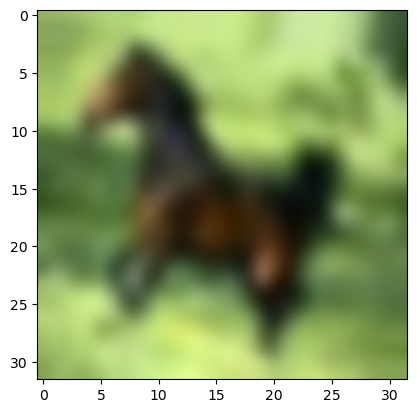

In [6]:
#Applying data augmentation

#Creating an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #shear_range=0.2, #Drops the accuracy by 0.2
    fill_mode='nearest',
    horizontal_flip=True)

#Fitting the data generator to the training data
datagen.fit(x_train)

# Generate augmented images and visualize them
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
i = 0
for batch in datagen.flow(x_train, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]), interpolation='bicubic')
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [7]:
#Function to plot training and validation curves
def training_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(history.history['loss']))

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()
    return None

In [8]:
#Building the model architecture
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
#Compiling the model
model.compile(loss=keras.metrics.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
#Fitting the model

#Model Summary
model.summary()

print("\n\n")

#Fitting the model
history = model.fit(datagen.flow(x_train,
                    y_train,
                    batch_size=64),
                    steps_per_epoch=len(x_train)//64,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

#Saving the model
model.save("LeNet_CIFAR-10.keras")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

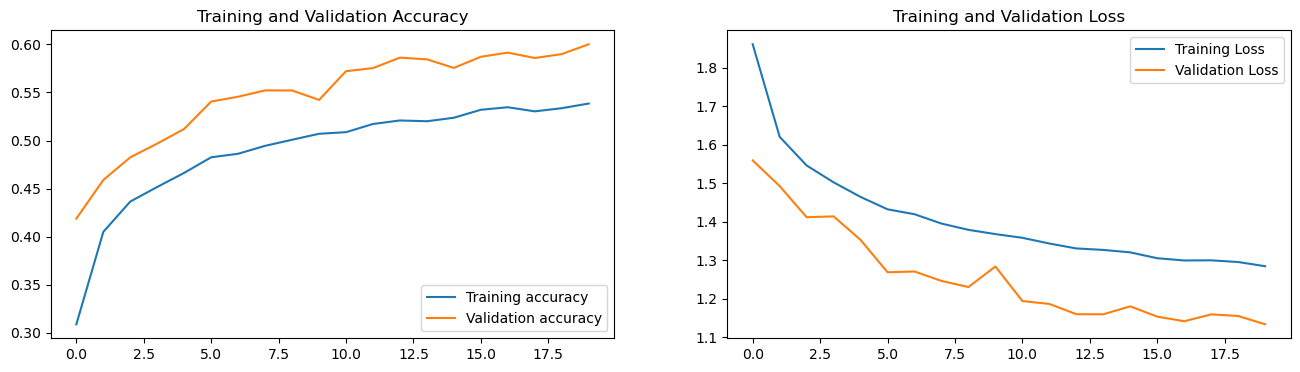

In [11]:
#Train and validation plots
training_history(history)

In [12]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 1.1341 - accuracy: 0.6002
Test Loss: 1.134130835533142
Test Accuracy: 0.6001999974250793


Optimizers like RMSprop and SGD yield higher accuracy for this model but exhibit significant fluctuations, especially without data augmentation. Using the current configuration with the Adam optimizer and data augmentation techniques results in smoother training and loss curves.

When evaluating the performance of a model, both the smoothness of the training and validation accuracy curves and the highest accuracy achieved are important, but they indicate different aspects of model performance. Here's a detailed look at these two considerations:

Smoothness of Accuracy Curves
Why Smoothness Matters:

Stability: Smooth curves indicate stable learning and convergence of the model. Fluctuations can suggest issues such as an inappropriate learning rate, poor data quality, or a model that is too complex for the data.
Generalization: Smooth validation accuracy suggests that the model generalizes well to unseen data, meaning it has learned meaningful patterns rather than overfitting to the noise in the training data.
Highest Accuracy Achieved
Why Highest Accuracy Matters:

Performance: The highest accuracy reflects the best performance of your model on the validation or test set. This is a direct measure of how well your model performs on unseen data.
Benchmarking: Achieving high accuracy is often necessary to meet benchmarks and performance criteria, especially in competitive or production environments.
Balancing Smoothness and Highest Accuracy
Consider Both Aspects:

Overfitting: If your training accuracy is high but validation accuracy fluctuates or is much lower, it might indicate overfitting. The model performs well on training data but poorly on validation data.
Underfitting: If both training and validation accuracies are low, the model may be underfitting, meaning it has not learned enough from the data.

Practical Tips
Use Early Stopping: This can help to prevent overfitting by stopping training once the validation loss starts to increase.
Regularization: Techniques such as dropout, L2 regularization, and data augmentation can help to achieve smoother and more generalizable models.
Learning Rate Schedules: Adjusting the learning rate dynamically during training can help in achieving both stable and high accuracy.
Model Complexity: Ensure the model complexity matches the complexity of your data. A too complex model can overfit, and a too simple model can underfit.

Let's test this model on a real image

In [41]:
#Importing necessary packages
import numpy as np
import cv2
from keras.models import load_model

In [48]:
#Loading external image to classify
image_path = "deer.jpg"

In [49]:
#Loading and preprocessing the image
img = cv2.imread(image_path) #RGB Input

#Resizing the image to 32X32 pixels
img = cv2.resize(img, (32,32))

#Inverting the image (Flipping the color of the background and foreground)
#img = cv2.bitwise_not(img)

#Normalizing the image
img = img.astype('float32')/255.0

#Reshaping the image to match the input shape of the model
img = img.reshape(1, 32, 32, 3) #(batch_size, height, width, num_channels)

In [50]:
#Loading the pre-trained model
model = load_model('LeNet_CIFAR-10.keras')

In [51]:
#Predicting the class of the image
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 100ms/step


In [52]:
#Displaying the result
print(f'The predicted class is: {predicted_class}')

The predicted class is: 7


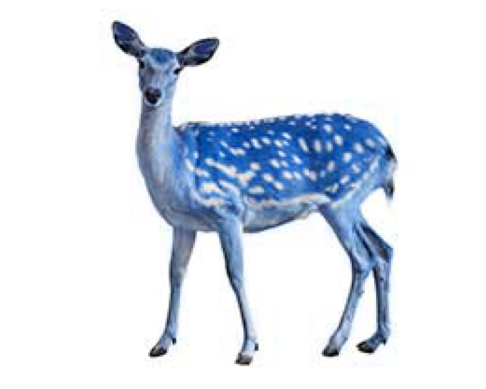

In [53]:
#Displaying the original image 
image = cv2.imread(image_path)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

The model is correctly classifying an airplane but fails to differentiates between a deer and a horse.